In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [ ]:
# Load dataset Wine
wine = datasets.load_wine()
x = wine.data  # Features
y = wine.target  # Labels

In [ ]:
# Konversi dataset menjadi DataFrame agar mudah divisualisasikan
df_x = pd.DataFrame(x, columns=wine.feature_names)
df_y = pd.Series(y, name='target')
df = pd.concat([df_x, df_y], axis=1)

In [ ]:
# Split dataset menjadi training (80%) dan testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

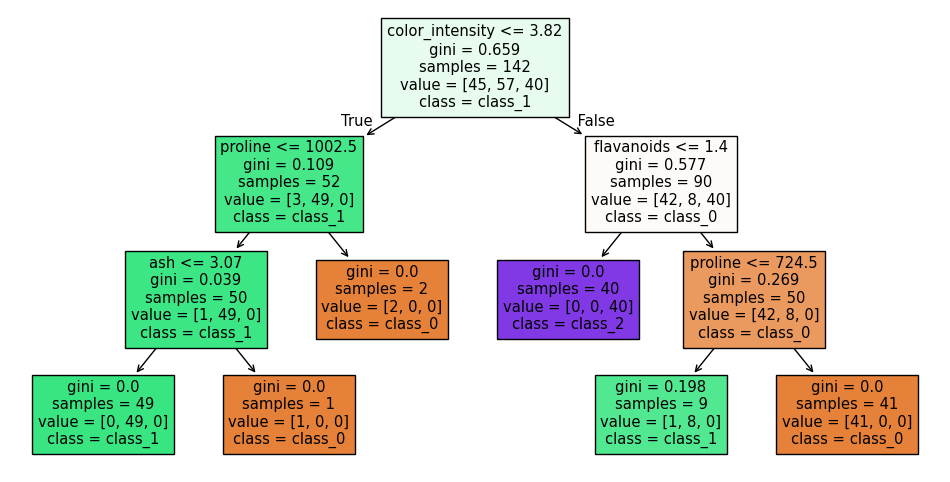

In [ ]:
# Visualisasi Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()

In [ ]:
# Evaluasi Model
y_pred = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



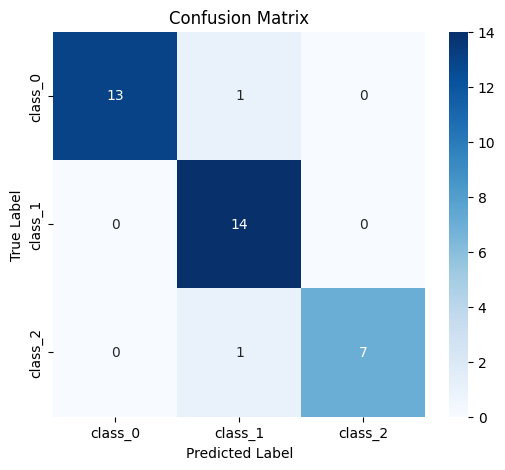

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

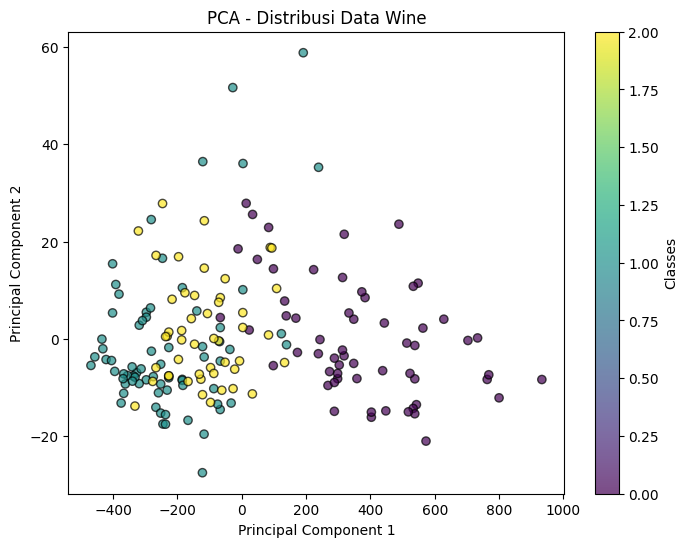

In [ ]:
# Visualisasi Decision Boundary menggunakan PCA
pca = PCA(n_components=2)  # Reduksi ke 2 dimensi
x_pca = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap="viridis", edgecolor="k", alpha=0.7)
plt.colorbar(scatter, label="Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Distribusi Data Wine")
plt.show()